In [199]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
from os import listdir
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Problem 1

My score was 41%. Turns out my answers were so much more pessimistic than reality. The question I choose to dive deeper into is the "In the last 20 years the proportion of people living in extreme poverty worldwide has..?"

As it turns out, it appears that the income inequality has actually been imporoving. As shown in the plots below, the income share of the richest 20% and the richest 10% has been declining since the mid 90's. This is validated by looking at the correlation heatmap where only the income share of the richest 20% and the richest 10% appears to be negatively correlated with time. All other income groups appear to be slightly positively correlated with time

In [20]:
glob.glob('data/ddf--datapoints--income_share_of*')

['data/ddf--datapoints--income_share_of_poorest_20percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_2nd_poorest_20percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_2nd_richest_20percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_richest_10percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_richest_20percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_poorest_10percent--by--geo--time.csv',
 'data/ddf--datapoints--income_share_of_middle_20percent--by--geo--time.csv']

In [31]:
income_share_df = pd.DataFrame(columns = ['geo', 'time'])

for data in glob.glob('data/ddf--datapoints--income_share_of*'):
    income_share_df = pd.merge(pd.read_csv(data), income_share_df, on = ['geo', 'time'], how = 'outer')

In [40]:
income_share_df

,geo,time,income_share_of_middle_20percent,income_share_of_poorest_10percent,income_share_of_richest_20percent,income_share_of_richest_10percent,income_share_of_2nd_richest_20percent,income_share_of_2nd_poorest_20percent,income_share_of_poorest_20percent
0,ago,2000,12.7,1.0,56.1,40.2,20.2,7.8,3.2
1,ago,2008,14.5,2.1,48.5,32.3,21.9,9.6,5.4
2,alb,1996,17.7,3.9,36.1,21.2,23.3,13.7,9.2
3,alb,2002,16.5,3.5,40.4,25.4,22.2,12.6,8.4
4,alb,2005,17.0,3.5,39.2,24.3,22.5,12.9,8.4
...,...,...,...,...,...,...,...,...,...
1387,zmb,2004,11.2,1.3,59.0,42.7,19.4,6.9,3.5
1388,zmb,2006,11.1,1.3,59.5,43.2,19.1,6.8,3.5
1389,zmb,2010,10.5,1.5,61.1,45.2,17.9,6.8,3.8
1390,zmb,2015,10.6,1.0,61.3,44.4,19.3,6.0,2.9


In [42]:
income_share_bytime = income_share_df.groupby('time').mean()

<Figure size 1800x720 with 0 Axes>

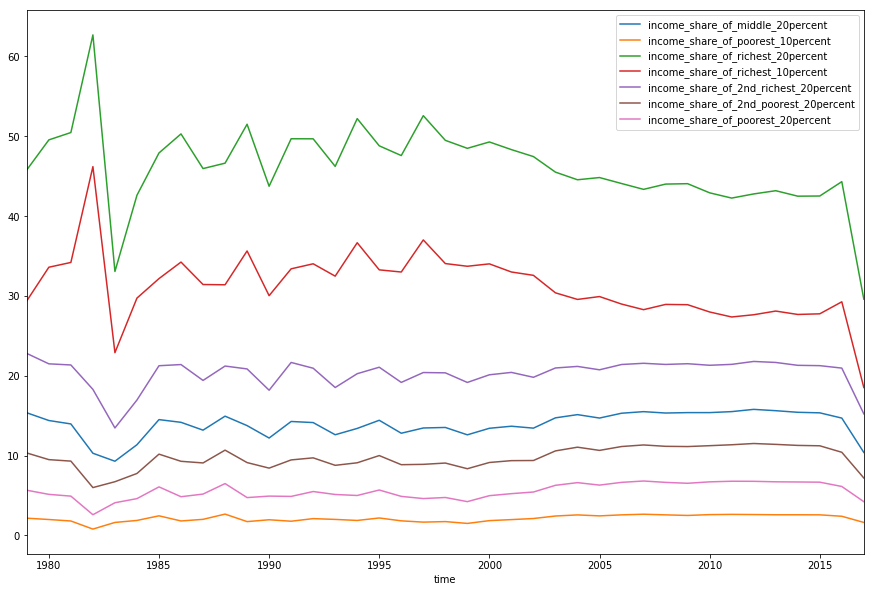

In [46]:
income_share_bytime.plot(figsize=(15,10))

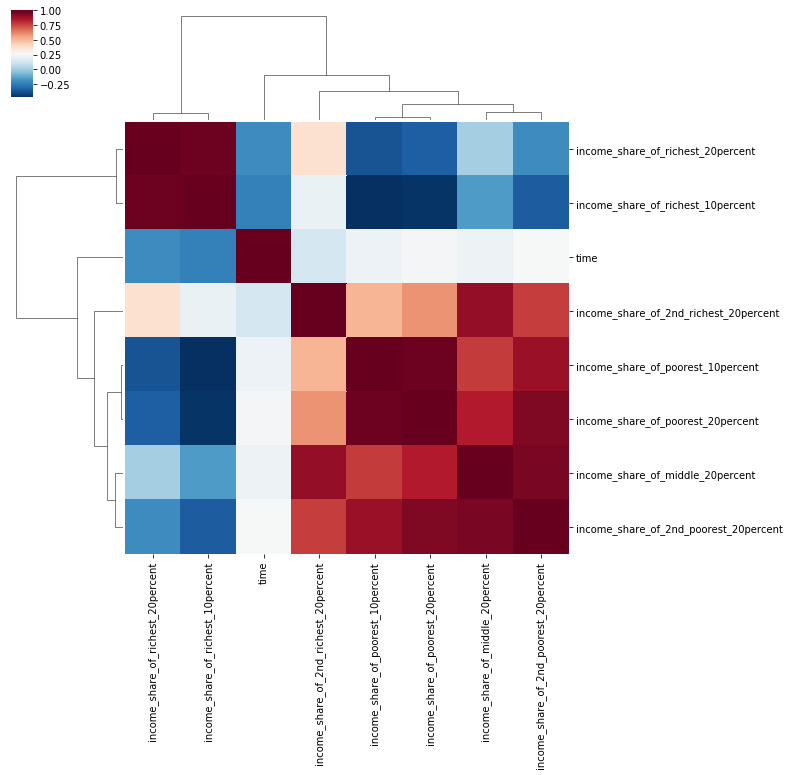

In [41]:
corr = income_share_df.corr()
sns.clustermap(corr,
               cmap="RdBu_r",
               method="ward", 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## Problem 2

Visualize the distribution of income (GDP / capita) across countries and continents, and how the distribution of income changes over time.

From the heatmap, it seems like, but for a few countries, most of the countries in the world are better off today than they were in 1960. About 4 countries seem to have constantly declined over the years, as far as GDP/Capita is concerned: Central African Republic, Madagascar, Liberia, Democratic Republic of Congo and Niger.

Another noticeable trend appears to be that it's rare for a country to have declined in GDP per capita once it's reached it's peak.

In [51]:
gdp_per_capita = pd.read_csv("data/ddf--datapoints--gdppercapita_us_inflation_adjusted--by--geo--time.csv")

In [105]:
gdp_per_capita_pivot_norm.index

Index(['abw', 'afg', 'ago', 'alb', 'and', 'are', 'arg', 'arm', 'asm', 'atg',
       ...
       'vct', 'ven', 'vir', 'vnm', 'vut', 'wsm', 'yem', 'zaf', 'zmb', 'zwe'],
      dtype='object', name='geo', length=203)

In [108]:
gdp_per_capita_pivot = gdp_per_capita.pivot(index='geo', columns='time', values='gdppercapita_us_inflation_adjusted')
x = gdp_per_capita_pivot.values.T
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
gdp_per_capita_pivot_norm = pd.DataFrame(x_scaled.T, columns=gdp_per_capita_pivot.columns,
                                         index = gdp_per_capita_pivot.index).sort_values(ascending=True,
                                                                                         by = 2017,
                                                                                         na_position = 'first')


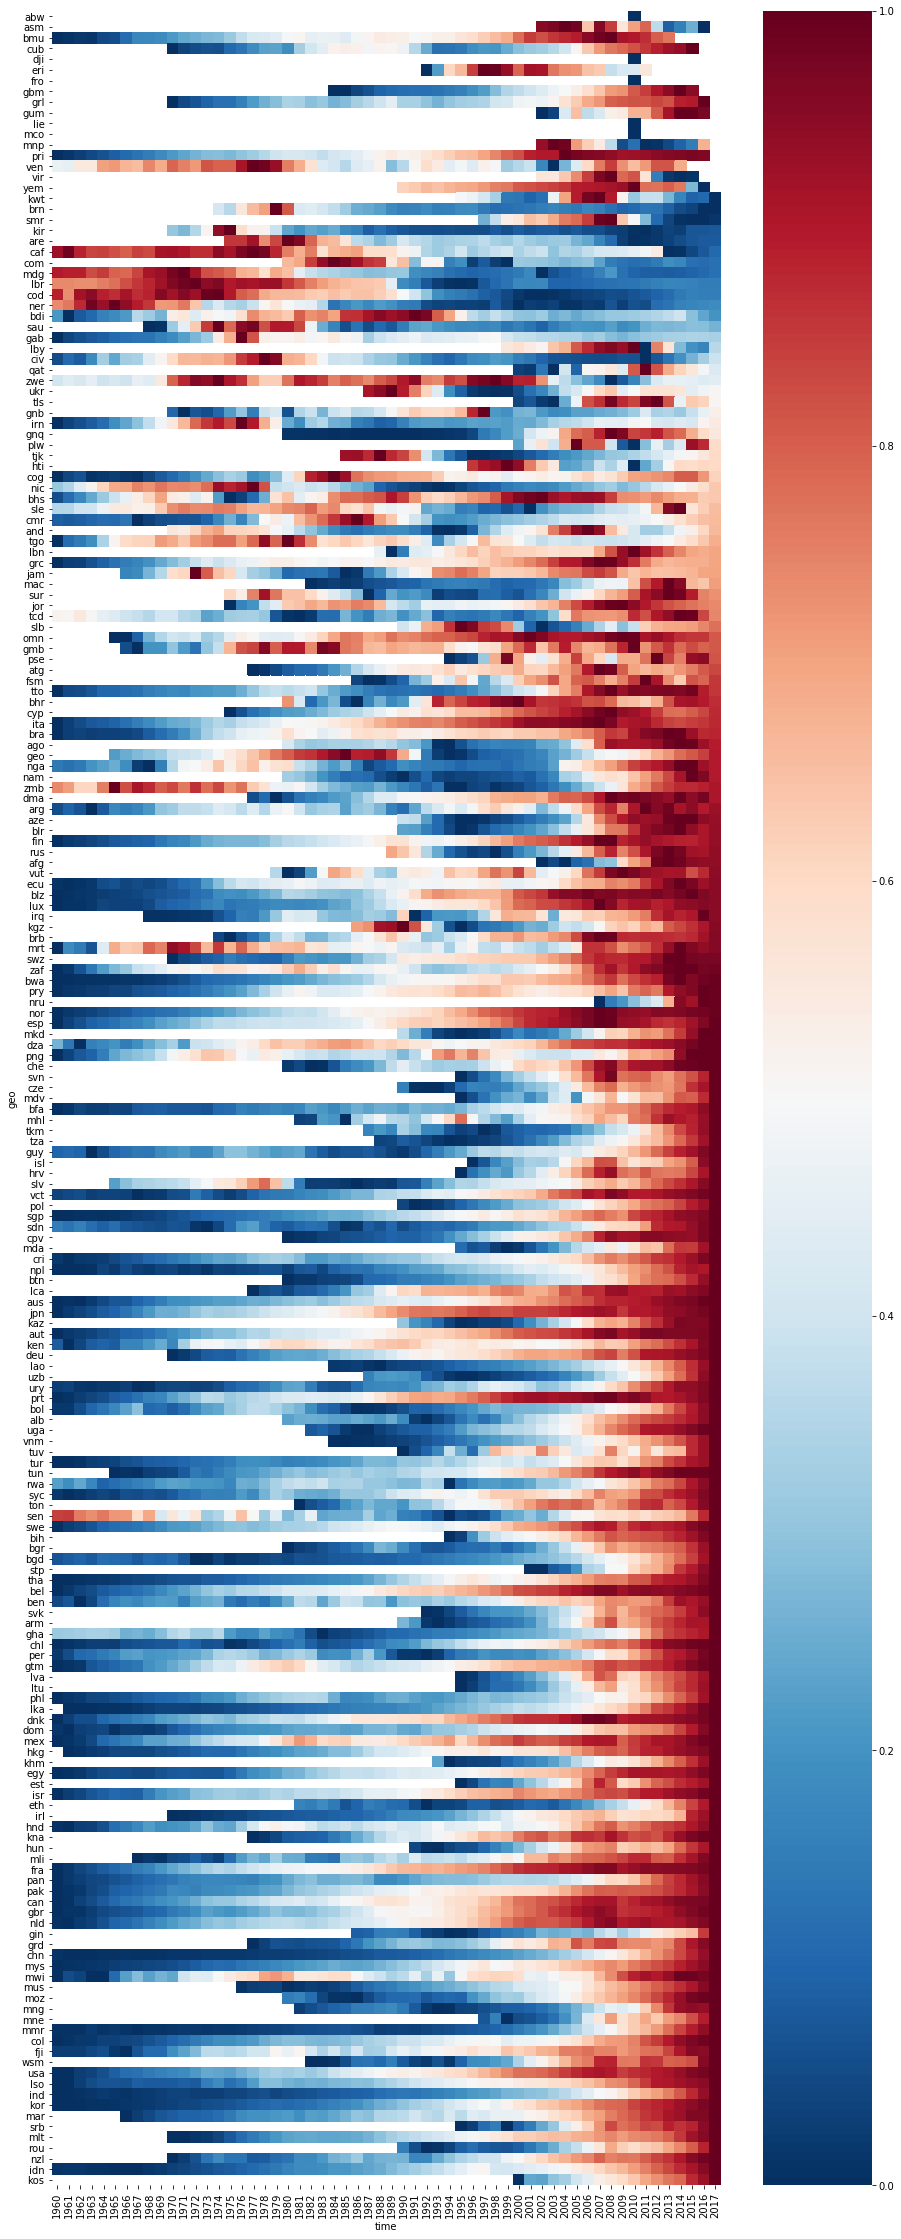

In [110]:
plt.figure(figsize=(15,40))
sns.heatmap(gdp_per_capita_pivot_norm,
               cmap="RdBu_r")

## Problem 3: 

Use visualization to investigate the relationship between income (GDP / capita), life expectancy, and child mortality over time. How does each measure change over time within each continent?
Interpret your visualizations, noting any trends and/or outliers.

It appears that over, time Child mortality has dropped significantly, while life expectancy and gdp per capita has increased as shown in the correlation clustermap shown below. Furthermore, the difference between child mortality rate has decreased with the worst countries catching up to the better ones. The life expectency has gone up steadily for the best and worst countries at a similar rate, while the gdp per capita while improving overall, has left some countries behind, widening the gap.

In [127]:
life_expectency = pd.read_csv('data/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
child_mortality = pd.read_csv('data/ddf--datapoints--child_mortality_0_5_year_olds_dying_per_1000_born--by--geo--time.csv')

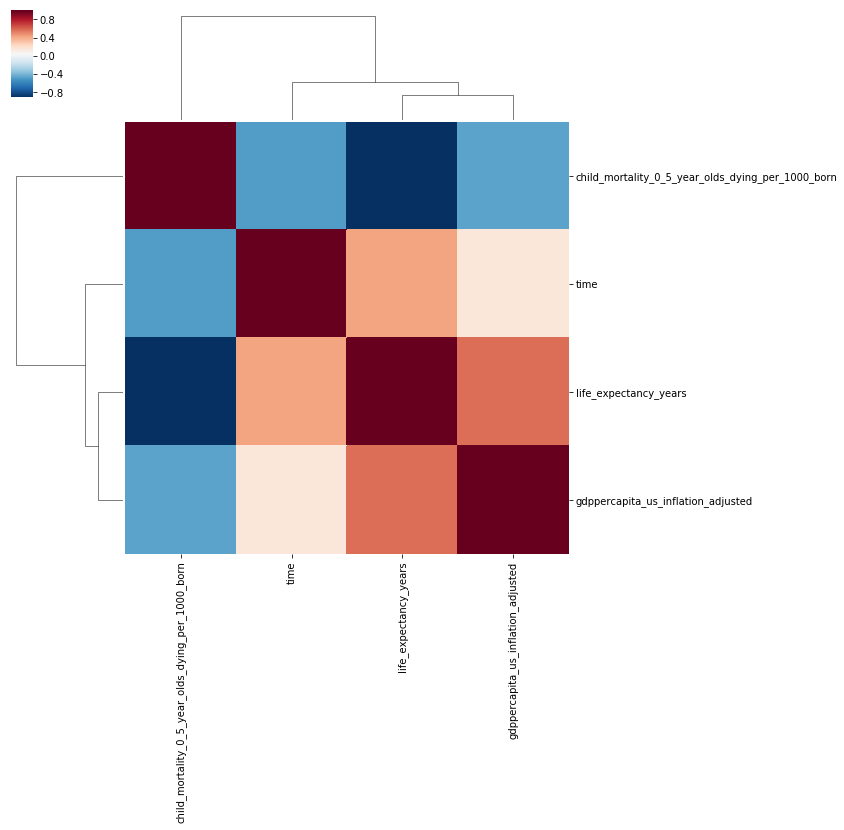

In [132]:
corr = problem_3_df.corr()

sns.clustermap(corr,
               cmap="RdBu_r",
               method="ward", 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [137]:
problem_3_df

,geo,time,child_mortality_0_5_year_olds_dying_per_1000_born,life_expectancy_years,gdppercapita_us_inflation_adjusted
0,abw,2010,17.969,75.06,24271.94042
1,afg,2002,122.200,52.43,364.57057
2,afg,2003,118.300,53.03,376.75871
3,afg,2004,114.400,53.50,364.09544
4,afg,2005,110.300,53.87,389.41636
...,...,...,...,...,...
8571,zwe,2013,70.000,55.59,942.03866
8572,zwe,2014,64.300,56.99,939.78027
8573,zwe,2015,59.900,58.27,933.50327
8574,zwe,2016,56.400,59.27,917.56372


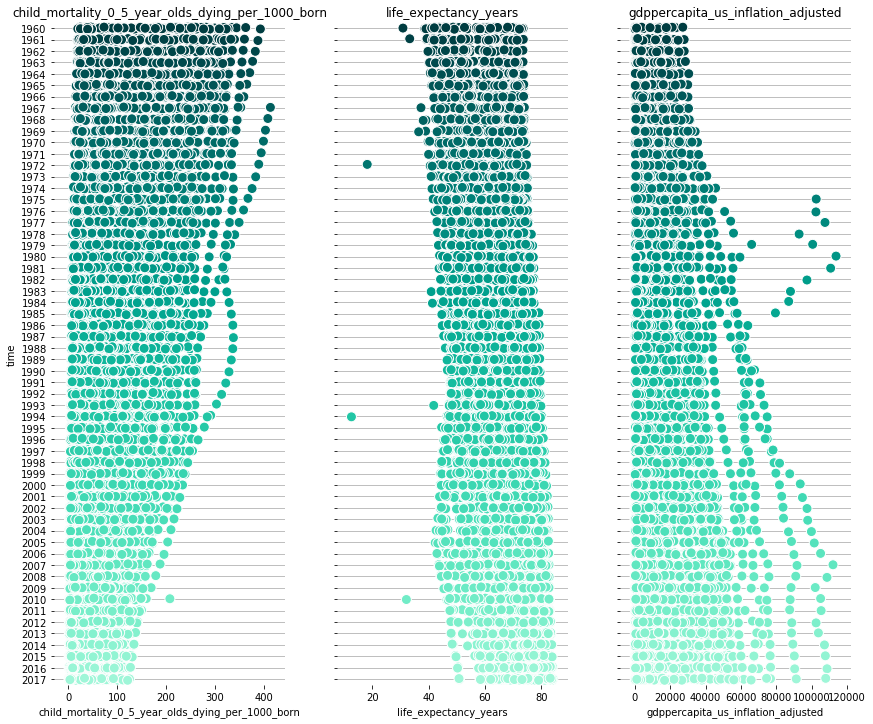

In [155]:
#crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(problem_3_df.sort_values('time', ascending = False),
                 x_vars=problem_3_df.columns[2:], y_vars=["time"],
                 height=10, aspect=.40)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=-2_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
#g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = problem_3_df.columns[2:]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

## Problem 4: 
Choose two variables you have not investigated yet, and visualize their distributions, their relationship with each other, and how these change over time.
Interpret your visualizations, noting any trends and/or outliers.

The three variables in question are nuclear_power, energy_use, coal_consumption. Based on my previous research, my hypothesis is that there should be an inverse correlation between nuclear energy and coal consumption per cap, especially when accounting for the increased energy use over time.

The plot shows the relationship between the nuclear_power and coal_consumption per capita. From the visualization it's clear that there is an inverse relationship between coal and nuclear power. This effect seems excarcebated with increasing levels of energy use per person (as shown by color and size). A point to note here would be the fact that at high levels of nuclear power generation per person, the coal consumption per person seems to drop to almost a minimum.

In [157]:
nuclear_power = pd.read_csv('data/ddf--datapoints--nuclear_power_generation_per_person--by--geo--time.csv')
energy_use    = pd.read_csv('data/ddf--datapoints--energy_use_per_person--by--geo--time.csv')
coal_consumption = pd.read_csv('data/ddf--datapoints--coal_consumption_per_cap--by--geo--time.csv')

In [158]:
problem_4_df = pd.merge(nuclear_power, coal_consumption, on = ['geo', 'time'])
problem_4_df = pd.merge(problem_4_df, energy_use, on = ['geo', 'time'])

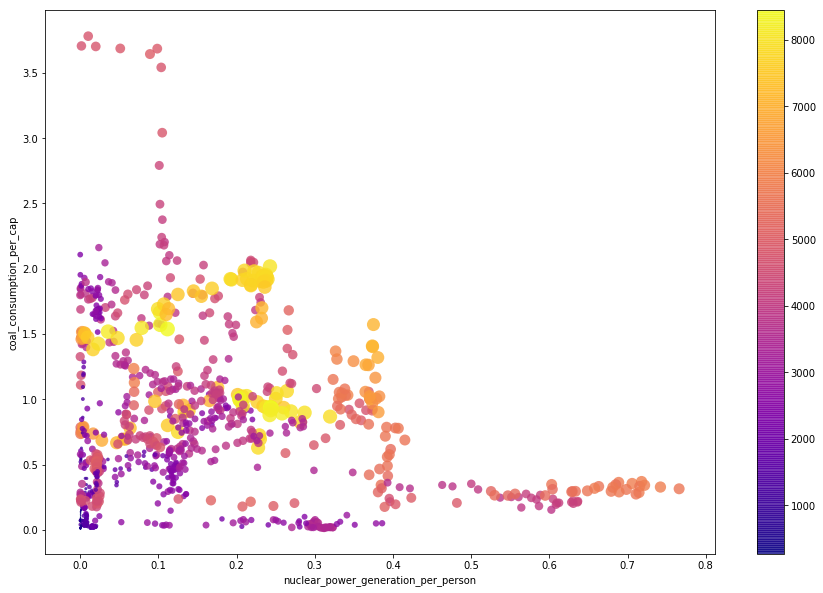

In [211]:
plt.figure(figsize=(15,10))
plt.scatter(problem_4_df['nuclear_power_generation_per_person'], problem_4_df['coal_consumption_per_cap'],
                c = list(problem_4_df['energy_use_per_person']),
                cmap = plt.cm.get_cmap('plasma'),
                edgecolor ='none', alpha=0.8,
                s = list((problem_4_df['energy_use_per_person']) ** 1.5)/np.mean(problem_4_df['energy_use_per_person']))

plt.xlabel('nuclear_power_generation_per_person')
plt.ylabel('coal_consumption_per_cap')
plt.colorbar()

## Problem 5

